# == Four classes Classification with Ensemble CNNs==



In [1]:
# Computational Intelligence Project
# Dipartimento di Ingegneria dell´Informazione , Universita´ di Pisa
# Authors: Rachele Nebbia Colomba, Alessandro Gentili, Giorgio Simonini
#    begin                : June 2020
#    copyright            : (C)  2020 Universita´ di pisa    
#    email                : rachelenebbia <at> gmail <dot> com

# Import libraries 
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
print(keras.__version__)
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn import metrics
import os
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from google.colab import drive
from tensorflow.keras.models import load_model


TensorFlow 1.x selected.
1.15.2
2.2.4-tf


Using TensorFlow backend.


In [2]:
# import data
drive.mount('/content/drive/')

dir_numpy ="/content/drive/My Drive/Computational/numpy data"
dir_nets ="/content/drive/My Drive/Computational/networks"
dir_check ="/content/drive/My Drive/Computational/networks"
dir_preModel ="/content/drive/My Drive/Computational/altro"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


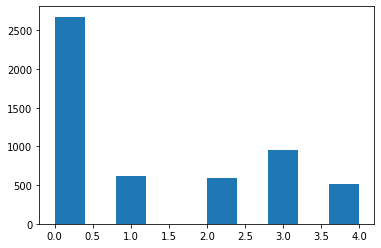

5352 images


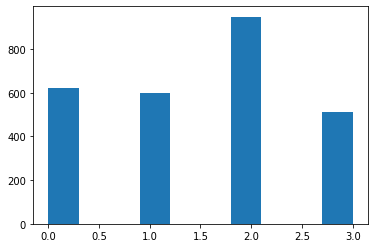

2676 images


In [3]:
# Load tensor for Training Dataset (images+labels) and Testing Dataset (images+labels)
train_img = np.load(os.path.join(dir_numpy,'train_tensor.npy'))
train_lab = np.load(os.path.join(dir_numpy,'train_labels.npy'))
test_img = np.load(os.path.join(dir_numpy,'public_test_tensor.npy'))
test_lab = np.load(os.path.join(dir_numpy,'public_test_labels.npy'))

# Plot histogram to visualize classes distribution of Dataset
plt.hist(train_lab)
plt.show()
print(len(train_lab), "images")

# Here define new tensors to divide between masses and calcifications
# Labels legend --> 0,1 = bening and malign masses; 2,3 = malign calcifications.
n_img=len(train_img)
train_img_5=train_img[1:n_img:2]
n_img_test=len(test_img)
test_img_5=test_img[1:n_img_test:2]
# From tensor getlabels
train_lab_5=train_lab[1:n_img:2]
test_lab_5=test_lab[1:n_img_test:2]
n_img5=len(train_img_5)
n_img5_test=len(test_img_5)
train_lab_5 = train_lab_5 - 1
test_lab_5 = test_lab_5 - 1
#Plot histogram to visualize data distribution 
plt.hist(train_lab_5)
plt.show()
print(len(train_lab_5), "images")

float32


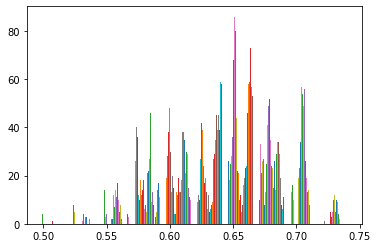

In [4]:
# Normalize train and test images 
train_img_5 = train_img_5.astype('float32') / 65535
test_img_5 = test_img_5.astype('float32') / 65535

# Visualize processing
print(train_img_5[5,:].dtype) # check the type
plt.hist(train_img_5[5,:]) # check the value range and the distribution
plt.show()

# Reshape datasets
train_img_5 = train_img_5.reshape((n_img5, 150, 150, 1))
test_img_5 = test_img_5.reshape((n_img5_test, 150, 150, 1))


In [ ]:
##shuffle samples to have random order of classes
train_lab_5 = to_categorical(train_lab_5)
test_lab_5 = to_categorical(test_lab_5)

In [ ]:
# Function to recolourize the imges
def gray_to_rgb(img):
    return np.repeat(img, 3, 2)

In [ ]:
# Data augmentation
BATCH_SIZE = 200

train_RGB = np.ndarray(shape=(train_img_5.shape[0], train_img_5.shape[1], train_img_5.shape[2], 3), dtype= np.float32) #dummy RGB images
train_RGB[:, :, :, 0] = train_img_5[:, :, :, 0]
train_RGB[:, :, :, 1] = train_img_5[:, :, :, 0]
train_RGB[:, :, :, 2] = train_img_5[:, :, :, 0]

test_RGB = np.ndarray(shape=(test_img_5.shape[0], test_img_5.shape[1], test_img_5.shape[2], 3), dtype= np.float32) #dummy RGB images
test_RGB[:, :, :, 0] = test_img_5[:, :, :, 0]
test_RGB[:, :, :, 1] = test_img_5[:, :, :, 0]
test_RGB[:, :, :, 2] = test_img_5[:, :, :, 0]

In [8]:
#Load pre-trained networks
model22 = load_model(os.path.join(dir_check,"checkpoint22b_1"))       # from scratch val_acc = 0.69
model32vgg = load_model(os.path.join(dir_check,"checkpoint32a"))      # VGG16 pretrained chest val_acc = 0.755
model32inc = load_model(os.path.join(dir_check,"checkpoint32c"))      # InceptionV3 pretrained imagenet val_acc = 0.505

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# Evaluation on entire dataset
loss_22, acc_22 = model22.evaluate(train_img_5, train_lab_5)
loss_32vgg, acc_32vgg = model32vgg.evaluate(train_RGB, train_lab_5)
loss_32inc, acc_32inc = model32inc.evaluate(train_RGB, train_lab_5)

2676/2676 [==============================] - 4s 2ms/sample - loss: 1.1878 - acc: 0.4387


In [10]:
# Test accuracy on the loaded networks
test_loss_22, test_acc_22 = model22.evaluate(test_img_5, test_lab_5)
test_loss_32vgg, test_acc_32vgg = model32vgg.evaluate(test_RGB, test_lab_5)
test_loss_32inc, test_acc_32inc = model32inc.evaluate(test_RGB, test_lab_5)

336/336 [==============================] - 1s 2ms/sample - loss: 1.2298 - acc: 0.4048


In [ ]:
#Predict function on test imeages
red22 = model22.predict(test_img_5)
pred32vgg = model32vgg.predict(test_RGB)
pred32inc = model32inc.predict(test_RGB)

In [ ]:
# Ensemble Network: weighted average of all pre-traine CNN
# ND: weights are the obtained accuracies
acc_fs = 0.69
acc_vgg = 0.755
acc_inc = 0.505
pred_5 = (acc_fs*pred22 + acc_vgg*pred32vgg + acc_inc*pred32inc)/(acc_fs + acc_vgg + acc_inc)


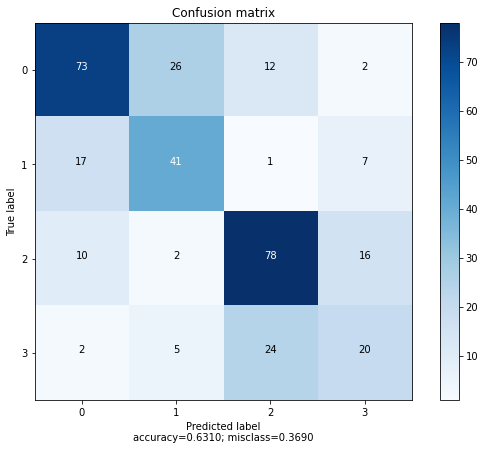

In [25]:
#Visualize Results in terms of Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
#Plotting of the Matrix confusion
def plot_confusion_matrix(cm,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xticks(range(0,4),)
    plt.yticks(range(0,4),)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
 
pred_5=np.argmax(pred_5,axis = 1)
true_5=np.argmax(test_lab_5,axis = 1)
metrics.confusion_matrix(true_5,pred_5)

conf_mtx = confusion_matrix(true_5, pred_5) 
plot_confusion_matrix(conf_mtx,normalize=False)